# Loading the Preprocessed Data and other additional Data
### Memuat Data yang Diproses Sebelumnya dan Data tambahan lainnya

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Mengatur direktori untuk tiap data yang akan digunakan
# Set the directory for each data to be used
preprocessed_train_data_dir = os.path.join('/kaggle/input/preprocessed-training-data/train_data_preprocessed.csv')
informasi_jalan_dir = os.path.join('/kaggle/input/informasi-jalan/informasi-jalan.csv')
test_data_dir = os.path.join('/kaggle/input/ristek-datathon-2023/test.csv')


# memuat data yang akan digunakan
# load the data to be used
def remove_timezone(dt_str):
    return dt_str.split('+')[0]

train_data = pd.read_csv(preprocessed_train_data_dir, 
                         parse_dates=['waktu_setempat'],
                         converters={'waktu_setempat': remove_timezone})

test_data = pd.read_csv(test_data_dir, parse_dates=['waktu_setempat'])
info_jalan = pd.read_csv(informasi_jalan_dir)


# melihat data train_data yang sudah dimuat
# see the loaded train_data data
train_data

,waktu_setempat,id_jalan,id_titik_mulai,id_titik_akhir,rerata_kecepatan,rute
0,2020-02-01 00:00:00,691007296,21390008,1425033102,29.126,21390008-1425033102
1,2020-02-01 01:00:00,691007296,21390008,1425033102,29.126,21390008-1425033102
2,2020-02-01 02:00:00,691007296,21390008,1425033102,34.772,21390008-1425033102
3,2020-02-01 03:00:00,691007296,21390008,1425033102,34.161,21390008-1425033102
4,2020-02-01 04:00:00,691007296,21390008,1425033102,39.383,21390008-1425033102
...,...,...,...,...,...,...
493147,2020-02-22 19:00:00,24704286,130234354,1578999260,31.028,130234354-1578999260
493148,2020-02-22 20:00:00,24704286,130234354,1578999260,32.845,130234354-1578999260
493149,2020-02-22 21:00:00,24704286,130234354,1578999260,32.845,130234354-1578999260
493150,2020-02-22 22:00:00,24704286,130234354,1578999260,35.673,130234354-1578999260


# Additional Preprocessing to suit the Model's Need
### Preprocessing tambahan untuk memenuhi kebutuhan Model

In [2]:
# melihat data info_jalan yang sudah dimuat
# see the loaded info_jalan data

info_jalan = pd.read_csv(informasi_jalan_dir)
info_jalan

# info_jalan mengandung berbagai informasi mengenai jalan-jalan yang ada di data train_data, 
# seperti nama jalan, lokasi geografis, kecepatan maksimum, dll

# info_jalan contains various information about roads in the train_data data,
# such as street names, geographic locations, maximum speed, etc.

,w_id,geo,highway,lit,maxspeed,name,ref
0,1210,"LINESTRING (-0.1802294 51.6398113, -0.1801711 ...",primary,yes,30 mph,High Road,A1000
1,3688059,"LINESTRING (-0.2438268 51.4652563, -0.2438951 ...",trunk,yes,30 mph,Roehampton Lane,A306
2,3691841,"LINESTRING (-0.2287468 51.4632189, -0.2287007 ...",trunk,yes,30 mph,Upper Richmond Road,A205
3,4004732,"LINESTRING (-0.2512982 51.4652257, -0.2518281 ...",trunk,yes,30 mph,Upper Richmond Road West,A205
4,4060819,"LINESTRING (-0.1247121 51.459605, -0.1241664 5...",primary,yes,20 mph,Acre Lane,A2217
5,4061596,"LINESTRING (-0.130106 51.4525672, -0.1301601 5...",secondary,yes,20 mph,Kings Avenue,B221
6,4898588,"LINESTRING (-0.1132653 51.4543707, -0.1131892 ...",primary,yes,20 mph,Tulse Hill,A204
7,8504977,"LINESTRING (-0.2368584 51.5322482, -0.236752 5...",primary,yes,30 mph,Harrow Road,A404
8,22932408,"LINESTRING (-0.1634248 51.4483532, -0.1632963 ...",secondary,yes,20 mph,Nightingale Lane,B237
9,24704286,"LINESTRING (0.0203705 51.5457204, 0.0211241 51...",primary,yes,30 mph,Romford Road,A118


In [3]:
# mengganti nama kolom w_id supaya tabel info_jalan bisa digabungkan dengan tabel train_data
# rename the w_id column so that the info_jalan table can be merged with the train_data table

info_jalan = info_jalan.rename(columns={'w_id':'id_jalan'})
info_jalan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id_jalan  20 non-null     int64 
 1   geo       20 non-null     object
 2   highway   20 non-null     object
 3   lit       20 non-null     object
 4   maxspeed  20 non-null     object
 5   name      20 non-null     object
 6   ref       20 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.2+ KB


In [4]:
# menggabungkan data pada tabel train_data dan tabel info_jalan untuk mendapatkan tabel yang komprehensif dan lengkap
# merge the data in the train_data table and the road_info table to obtain a comprehensive and complete table

train_data_w_info = train_data.merge(info_jalan,on=['id_jalan'],how='left')
train_data = train_data_w_info
train_data_w_info

,waktu_setempat,id_jalan,id_titik_mulai,id_titik_akhir,rerata_kecepatan,rute,geo,highway,lit,maxspeed,name,ref
0,2020-02-01 00:00:00,691007296,21390008,1425033102,29.126,21390008-1425033102,"LINESTRING (-0.1604803 51.4352873, -0.1601615 ...",trunk,yes,30 mph,Upper Tooting Road,A24
1,2020-02-01 01:00:00,691007296,21390008,1425033102,29.126,21390008-1425033102,"LINESTRING (-0.1604803 51.4352873, -0.1601615 ...",trunk,yes,30 mph,Upper Tooting Road,A24
2,2020-02-01 02:00:00,691007296,21390008,1425033102,34.772,21390008-1425033102,"LINESTRING (-0.1604803 51.4352873, -0.1601615 ...",trunk,yes,30 mph,Upper Tooting Road,A24
3,2020-02-01 03:00:00,691007296,21390008,1425033102,34.161,21390008-1425033102,"LINESTRING (-0.1604803 51.4352873, -0.1601615 ...",trunk,yes,30 mph,Upper Tooting Road,A24
4,2020-02-01 04:00:00,691007296,21390008,1425033102,39.383,21390008-1425033102,"LINESTRING (-0.1604803 51.4352873, -0.1601615 ...",trunk,yes,30 mph,Upper Tooting Road,A24
...,...,...,...,...,...,...,...,...,...,...,...,...
493147,2020-02-22 19:00:00,24704286,130234354,1578999260,31.028,130234354-1578999260,"LINESTRING (0.0203705 51.5457204, 0.0211241 51...",primary,yes,30 mph,Romford Road,A118
493148,2020-02-22 20:00:00,24704286,130234354,1578999260,32.845,130234354-1578999260,"LINESTRING (0.0203705 51.5457204, 0.0211241 51...",primary,yes,30 mph,Romford Road,A118
493149,2020-02-22 21:00:00,24704286,130234354,1578999260,32.845,130234354-1578999260,"LINESTRING (0.0203705 51.5457204, 0.0211241 51...",primary,yes,30 mph,Romford Road,A118
493150,2020-02-22 22:00:00,24704286,130234354,1578999260,35.673,130234354-1578999260,"LINESTRING (0.0203705 51.5457204, 0.0211241 51...",primary,yes,30 mph,Romford Road,A118


In [5]:
# mengganti nama kolom pada tabel train_data supaya tabel train_data bisa digunakan oleh model
# rename the column names in the train_data table so that the train_data table can be used by the model

# model tidak selalu mengharapkan kolom diberi nama dengan cara seperti itu, tetapi umumnya ini merupakan praktik yang baik:
# unique_id : kolom yang mengidentifikasi seri yang berbeda dalam tabel
# ds        : kolom yang berisi timesteps/date/waktu pada data
# y         : kolom yang berisi nilai yang akan diprediksi/diperkirakan

# the model doesn't necessarily expect the column to be name in such manner, but it's generally a good practice:
# unique_id : the column that identifies different series in the table
# ds        : the column that contains the timesteps/date in the data
# y         : the column that contains the value to be predicted/forecasted

train = train_data.rename(columns={
    'rute': 'unique_id', 
    'waktu_setempat': 'ds', 
    'rerata_kecepatan': 'y'
})
train.head()

,ds,id_jalan,id_titik_mulai,id_titik_akhir,y,unique_id,geo,highway,lit,maxspeed,name,ref
0,2020-02-01 00:00:00,691007296,21390008,1425033102,29.126,21390008-1425033102,"LINESTRING (-0.1604803 51.4352873, -0.1601615 ...",trunk,yes,30 mph,Upper Tooting Road,A24
1,2020-02-01 01:00:00,691007296,21390008,1425033102,29.126,21390008-1425033102,"LINESTRING (-0.1604803 51.4352873, -0.1601615 ...",trunk,yes,30 mph,Upper Tooting Road,A24
2,2020-02-01 02:00:00,691007296,21390008,1425033102,34.772,21390008-1425033102,"LINESTRING (-0.1604803 51.4352873, -0.1601615 ...",trunk,yes,30 mph,Upper Tooting Road,A24
3,2020-02-01 03:00:00,691007296,21390008,1425033102,34.161,21390008-1425033102,"LINESTRING (-0.1604803 51.4352873, -0.1601615 ...",trunk,yes,30 mph,Upper Tooting Road,A24
4,2020-02-01 04:00:00,691007296,21390008,1425033102,39.383,21390008-1425033102,"LINESTRING (-0.1604803 51.4352873, -0.1601615 ...",trunk,yes,30 mph,Upper Tooting Road,A24


In [6]:
#mengubah kolom maxspeed agar hanya menggunakan nilai angka dari data kecepatan maksimal
# contoh : "30 mph" -> 30

# change the maxspeed column so that it only uses numerical values from the maximum speed data
# example : "30 mph" -> 30

train['maxspeed'] = train['maxspeed'].str.extract('(\d+)').astype(int)
train.head()

,ds,id_jalan,id_titik_mulai,id_titik_akhir,y,unique_id,geo,highway,lit,maxspeed,name,ref
0,2020-02-01 00:00:00,691007296,21390008,1425033102,29.126,21390008-1425033102,"LINESTRING (-0.1604803 51.4352873, -0.1601615 ...",trunk,yes,30,Upper Tooting Road,A24
1,2020-02-01 01:00:00,691007296,21390008,1425033102,29.126,21390008-1425033102,"LINESTRING (-0.1604803 51.4352873, -0.1601615 ...",trunk,yes,30,Upper Tooting Road,A24
2,2020-02-01 02:00:00,691007296,21390008,1425033102,34.772,21390008-1425033102,"LINESTRING (-0.1604803 51.4352873, -0.1601615 ...",trunk,yes,30,Upper Tooting Road,A24
3,2020-02-01 03:00:00,691007296,21390008,1425033102,34.161,21390008-1425033102,"LINESTRING (-0.1604803 51.4352873, -0.1601615 ...",trunk,yes,30,Upper Tooting Road,A24
4,2020-02-01 04:00:00,691007296,21390008,1425033102,39.383,21390008-1425033102,"LINESTRING (-0.1604803 51.4352873, -0.1601615 ...",trunk,yes,30,Upper Tooting Road,A24


In [9]:
#split the data into training and validation sets with roughly 80:20 proportion
#bagi data menjadi set training dan validasi dengan proporsi sekitar 80:20

training = train[['ds','y','unique_id','maxspeed']][train['ds'] < "2020-02-18"]
valid = train[['ds','y','unique_id','maxspeed']][train['ds'] >= "2020-02-18"]
horizon = valid['ds'].nunique()

# Build and Train model to obtain baseline performance
### Bangun dan Latih model untuk mendapatkan patokan kinerja

In [7]:
# install library yang dibutuhkan 
# install necessary libraries

!pip install mlforecast
!pip install lightgbm
!pip install xgboost
!pip install window_ops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.8 MB/s eta 0:00:00


In [8]:
# import library yang dibutuhkan 
# import necessary libraries

from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
from mlforecast.utils import PredictionIntervals
from window_ops.expanding import expanding_mean
from window_ops.ewm import ewm_mean
from lightgbm import LGBMRegressor

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
#instantiate the LGBMRegressor model and MLForecast object 
#instantiate model LGBMRegressor dan objek MLForecast

SEED=42
models = [LGBMRegressor(max_depth=10, random_state=SEED)]

mlf = MLForecast(
    models=models,  # List of models for forecasting - Daftar model untuk peramalan
    freq='H',  # Frequency of the data - 'H' for hourly frequency - Frekuensi data - 'H' untuk frekuensi per jam
    differences=[24],
    lags=[24 * (i+1) for i in range(7)],  # Specific lags to use as regressors: 1 to 6 days - Lag spesifik untuk digunakan sebagai regressor: 1 hingga 6 hari
    lag_transforms = {
        24: [(ewm_mean, 0.3)],
    },
    date_features=['dayofweek', 'hour', 'week'],  # Date features to use as regressors - Fitur tanggal untuk digunakan sebagai regressor
)

/opt/conda/lib/python3.10/site-packages/mlforecast/core.py:151: UserWarning: The differences argument is deprecated and will be removed in a future version.
Please pass an `mlforecast.target_transforms.Differences` instance to the `target_transforms` argument instead.
  warnings.warn(


In [15]:
import time

# Start the timer to calculate the time taken for fitting the models
# Mulai pengatur waktu untuk menghitung waktu yang dibutuhkan untuk melatih model
start_time = time.time()

# Fit the MLForecast models to the data, with prediction intervals set using a window size of window_size days
# melatih model MLForecast dengan data, dengan interval prediksi yang ditetapkan menggunakan ukuran jendela hari window_size
mlf.fit(training, id_col='unique_id', time_col='ds', target_col='y', static_features=['maxspeed'])

# Calculate the end time after fitting the models
# Hitung waktu akhir setelah melatih model
elapsed_time = time.time() - start_time

mins = int(elapsed_time // 60)
sec = int(elapsed_time % 60)

print(f'Total Training time : {mins} Mins {sec} Seconds')

Total Training time : 0 Mins 6 Seconds


In [16]:
# melakukan prediksi pada validation set
# perform predictions on validation sets
preds = mlf.predict(horizon=horizon)
preds = preds.merge(valid[['ds','unique_id','y']], on=['ds','unique_id'], how='left')
preds

#kolom LGBMRegressor mengndung prediksi dari model, kolom y mengandung nilai sebenarnya
#LGBMRegressor column contains predicted values from the model, y column contains actual values

,unique_id,ds,LGBMRegressor,y
0,101831-905115460,2020-02-18 00:00:00,31.605826,34.048
1,101831-905115460,2020-02-18 01:00:00,32.145907,34.048
2,101831-905115460,2020-02-18 02:00:00,33.327762,33.279
3,101831-905115460,2020-02-18 03:00:00,33.744013,29.433
4,101831-905115460,2020-02-18 04:00:00,34.490614,29.433
...,...,...,...,...
112075,997589816-997589768,2020-02-22 19:00:00,40.673480,44.598
112076,997589816-997589768,2020-02-22 20:00:00,39.770942,44.938
112077,997589816-997589768,2020-02-22 21:00:00,44.077218,44.902
112078,997589816-997589768,2020-02-22 22:00:00,44.221613,45.697


In [17]:
#Menghitung nilai SMAPE loss untuk mengukur performa model
#Calculate SMAPE loss value to measure model performance

def smape(actual, forecast):
    return 100 * np.mean(2 * np.abs(actual - forecast) / (np.abs(actual) + np.abs(forecast)))

error = smape(preds['y'],preds['LGBMRegressor'])
print(f'SMAPE Score = {error}')

# The obtained SMAPE value is 8.891172310052706, which we will aim to improve when tuning the model
# Nilai SMAPE yang diperoleh adalah 8.891172310052706, yang akan kami tingkatkan saat men-tuning model

SMAPE Score = 8.891172310052706


# Tuning the LGBMRegressor Model with Optuna
### Tuning Model LGBMRegressor dengan Optuna

In [18]:
!pip install optuna

In [19]:
import optuna

def smape(actual, forecast):
    return 100 * np.mean(2 * np.abs(actual - forecast) / (np.abs(actual) + np.abs(forecast)))

#Define objective function to minnimize the SMAPE loss value
#Tentukan fungsi objektif untuk meminimalkan nilai SMAPE

def objective(trial):
    
    #the following is the hyperparameters to be tuned
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
    num_leaves = trial.suggest_int('num_leaves', 2, 256)
    min_data_in_leaf = trial.suggest_int('min_data_in_leaf', 1, 100)
    bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.1, 1.0)
    differences = trial.suggest_int('differences', 24, 168, step=24)

    models = [LGBMRegressor(random_state=42, n_estimators=500, bagging_freq=1,
                            learning_rate=learning_rate, num_leaves=num_leaves,
                            min_data_in_leaf=min_data_in_leaf, bagging_fraction=bagging_fraction,
                            colsample_bytree=colsample_bytree)]
    
    mlf = MLForecast(
    models=models,  
    freq='H',  
    differences=[differences],
    lags=[24 * (i+1) for i in range(7)],  
    lag_transforms = {
        24: [(ewm_mean, 0.3)],
    },
    date_features=['dayofweek', 'hour', 'week'], 
)
    
    mlf.fit(training, id_col='unique_id', time_col='ds', target_col='y', static_features=['maxspeed'])
    
    preds = mlf.predict(horizon=horizon)
    preds = preds.merge(valid[['ds','unique_id','y']], on=['ds','unique_id'], how='left')
    
    
    error = smape(preds['y'],preds['LGBMRegressor'])
    
    #the function returns the value to be minimized, which is the SMAPE loss function
    return error

In [20]:
import time

# Start the timer to calculate the time taken for tuning the models
# Mulai pengatur waktu untuk menghitung waktu yang dibutuhkan untuk men-tuning model
start_time = time.time()

# men-tuning model menggunakan objek study dan method optimize pada library optuna
# tuning the model using the study object and the optimize method in the optuna library
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100) # model akan di-tuning dalam 100 precobaan - # model will be tuned in 100 trials

# Calculate the end time after tuning the model
# Hitung waktu akhir setelah men-tuning model
elapsed_time = time.time() - start_time

mins = int(elapsed_time // 60)
sec = int(elapsed_time % 60)

print(f'Total Tuning time : {mins} Mins {sec} Seconds')

[I 2023-08-13 04:02:42,347] A new study created in memory with name: no-name-8a61d757-1a1d-468e-98e7-424821b6a29c
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  colsample_bytree = trial.suggest_uniform('colsample

[LightGBM] [Warning] bagging_fraction is set=0.21634096798096925, subsample=1.0 will be ignored. Current value: bagging_fraction=0.21634096798096925
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16


[I 2023-08-13 04:03:12,895] Trial 0 finished with value: 9.353539447356427 and parameters: {'learning_rate': 0.05319078397300256, 'num_leaves': 181, 'min_data_in_leaf': 16, 'bagging_fraction': 0.21634096798096925, 'colsample_bytree': 0.6551054096075493, 'differences': 48}. Best is trial 0 with value: 9.353539447356427.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform ha

[LightGBM] [Warning] bagging_fraction is set=0.27158797996898226, subsample=1.0 will be ignored. Current value: bagging_fraction=0.27158797996898226
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=89, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=89


[I 2023-08-13 04:03:30,856] Trial 1 finished with value: 10.12052544436676 and parameters: {'learning_rate': 0.006743512917356099, 'num_leaves': 101, 'min_data_in_leaf': 89, 'bagging_fraction': 0.27158797996898226, 'colsample_bytree': 0.6397954150526577, 'differences': 168}. Best is trial 0 with value: 9.353539447356427.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.8010728704587903, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8010728704587903
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32


[I 2023-08-13 04:04:07,966] Trial 2 finished with value: 10.904413987187123 and parameters: {'learning_rate': 0.0011837762459585726, 'num_leaves': 204, 'min_data_in_leaf': 32, 'bagging_fraction': 0.8010728704587903, 'colsample_bytree': 0.1788586203386155, 'differences': 24}. Best is trial 0 with value: 9.353539447356427.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.2671704093203285, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2671704093203285
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=73, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=73


[I 2023-08-13 04:04:13,964] Trial 3 finished with value: 10.980339114210425 and parameters: {'learning_rate': 0.0011119725332068239, 'num_leaves': 4, 'min_data_in_leaf': 73, 'bagging_fraction': 0.2671704093203285, 'colsample_bytree': 0.8925030713432158, 'differences': 168}. Best is trial 0 with value: 9.353539447356427.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform h

[LightGBM] [Warning] bagging_fraction is set=0.6087453206919459, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6087453206919459
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64


[I 2023-08-13 04:04:35,477] Trial 4 finished with value: 9.069983306202419 and parameters: {'learning_rate': 0.017964169487708886, 'num_leaves': 104, 'min_data_in_leaf': 64, 'bagging_fraction': 0.6087453206919459, 'colsample_bytree': 0.5352594132364265, 'differences': 48}. Best is trial 4 with value: 9.069983306202419.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform ha

[LightGBM] [Warning] bagging_fraction is set=0.8317883289280378, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8317883289280378
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41


[I 2023-08-13 04:04:48,879] Trial 5 finished with value: 10.919288023002615 and parameters: {'learning_rate': 0.0016798638977348784, 'num_leaves': 57, 'min_data_in_leaf': 41, 'bagging_fraction': 0.8317883289280378, 'colsample_bytree': 0.4081266521402178, 'differences': 168}. Best is trial 4 with value: 9.069983306202419.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.4165379249226052, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4165379249226052
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] bagging_fraction is set=0.4218697682575038, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4218697682575038
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55


[I 2023-08-13 04:05:53,439] Trial 7 finished with value: 10.652777219329089 and parameters: {'learning_rate': 0.0024368889531866723, 'num_leaves': 225, 'min_data_in_leaf': 55, 'bagging_fraction': 0.4218697682575038, 'colsample_bytree': 0.17044534391889232, 'differences': 24}. Best is trial 4 with value: 9.069983306202419.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform

[LightGBM] [Warning] bagging_fraction is set=0.20796167132543597, subsample=1.0 will be ignored. Current value: bagging_fraction=0.20796167132543597
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64


[I 2023-08-13 04:06:22,671] Trial 8 finished with value: 9.992918665163558 and parameters: {'learning_rate': 0.012278575933535135, 'num_leaves': 203, 'min_data_in_leaf': 64, 'bagging_fraction': 0.20796167132543597, 'colsample_bytree': 0.262441147945202, 'differences': 120}. Best is trial 4 with value: 9.069983306202419.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform h

[LightGBM] [Warning] bagging_fraction is set=0.38763061538280885, subsample=1.0 will be ignored. Current value: bagging_fraction=0.38763061538280885
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


[I 2023-08-13 04:06:49,456] Trial 9 finished with value: 10.103793837560202 and parameters: {'learning_rate': 0.005316095042776054, 'num_leaves': 180, 'min_data_in_leaf': 60, 'bagging_fraction': 0.38763061538280885, 'colsample_bytree': 0.6646541880298956, 'differences': 168}. Best is trial 4 with value: 9.069983306202419.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform

[LightGBM] [Warning] bagging_fraction is set=0.6342785120295842, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6342785120295842
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=98


[I 2023-08-13 04:07:10,245] Trial 10 finished with value: 10.64774566970215 and parameters: {'learning_rate': 0.021545307604082218, 'num_leaves': 110, 'min_data_in_leaf': 98, 'bagging_fraction': 0.6342785120295842, 'colsample_bytree': 0.40905838825920693, 'differences': 96}. Best is trial 4 with value: 9.069983306202419.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.1271439481883005, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1271439481883005
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12


[I 2023-08-13 04:07:37,909] Trial 11 finished with value: 9.92500921977418 and parameters: {'learning_rate': 0.038763523961098154, 'num_leaves': 156, 'min_data_in_leaf': 12, 'bagging_fraction': 0.1271439481883005, 'colsample_bytree': 0.7393285175703539, 'differences': 72}. Best is trial 4 with value: 9.069983306202419.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform ha

[LightGBM] [Warning] bagging_fraction is set=0.5948199498233957, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5948199498233957
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1


[I 2023-08-13 04:08:12,385] Trial 12 finished with value: 9.703581771403632 and parameters: {'learning_rate': 0.04313294714387405, 'num_leaves': 246, 'min_data_in_leaf': 1, 'bagging_fraction': 0.5948199498233957, 'colsample_bytree': 0.5414930544197434, 'differences': 72}. Best is trial 4 with value: 9.069983306202419.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform has

[LightGBM] [Warning] bagging_fraction is set=0.9989355332843864, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9989355332843864
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25


[I 2023-08-13 04:08:33,644] Trial 13 finished with value: 9.08459127179378 and parameters: {'learning_rate': 0.017444405392199384, 'num_leaves': 78, 'min_data_in_leaf': 25, 'bagging_fraction': 0.9989355332843864, 'colsample_bytree': 0.9880655954279031, 'differences': 48}. Best is trial 4 with value: 9.069983306202419.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform has

[LightGBM] [Warning] bagging_fraction is set=0.9710432443808783, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9710432443808783
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26


[I 2023-08-13 04:08:52,557] Trial 14 finished with value: 9.075721233499983 and parameters: {'learning_rate': 0.014912326642645394, 'num_leaves': 65, 'min_data_in_leaf': 26, 'bagging_fraction': 0.9710432443808783, 'colsample_bytree': 0.955475355715098, 'differences': 48}. Best is trial 4 with value: 9.069983306202419.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform has

[LightGBM] [Warning] bagging_fraction is set=0.7049792848594667, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7049792848594667
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=78, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=78


[I 2023-08-13 04:09:03,750] Trial 15 finished with value: 10.107178922424186 and parameters: {'learning_rate': 0.009824167923291608, 'num_leaves': 22, 'min_data_in_leaf': 78, 'bagging_fraction': 0.7049792848594667, 'colsample_bytree': 0.8212997164343584, 'differences': 120}. Best is trial 4 with value: 9.069983306202419.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.9988048914185778, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9988048914185778
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45


[I 2023-08-13 04:09:18,630] Trial 16 finished with value: 9.709270575750056 and parameters: {'learning_rate': 0.022744969984824448, 'num_leaves': 50, 'min_data_in_leaf': 45, 'bagging_fraction': 0.9988048914185778, 'colsample_bytree': 0.8914067521127262, 'differences': 72}. Best is trial 4 with value: 9.069983306202419.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform ha

[LightGBM] [Warning] bagging_fraction is set=0.5221212809438275, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5221212809438275
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


[I 2023-08-13 04:09:44,458] Trial 17 finished with value: 9.354919168330037 and parameters: {'learning_rate': 0.004676673024064568, 'num_leaves': 121, 'min_data_in_leaf': 30, 'bagging_fraction': 0.5221212809438275, 'colsample_bytree': 0.5199176974501359, 'differences': 24}. Best is trial 4 with value: 9.069983306202419.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform h

[LightGBM] [Warning] bagging_fraction is set=0.8687622661695067, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8687622661695067
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=73, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=73


[I 2023-08-13 04:10:10,497] Trial 18 finished with value: 10.76074142043705 and parameters: {'learning_rate': 0.011504162943929142, 'num_leaves': 141, 'min_data_in_leaf': 73, 'bagging_fraction': 0.8687622661695067, 'colsample_bytree': 0.7709575826943337, 'differences': 96}. Best is trial 4 with value: 9.069983306202419.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform h

[LightGBM] [Warning] bagging_fraction is set=0.7463439185883513, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7463439185883513
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52


[I 2023-08-13 04:10:29,650] Trial 19 finished with value: 9.09224206239243 and parameters: {'learning_rate': 0.029709447682645437, 'num_leaves': 87, 'min_data_in_leaf': 52, 'bagging_fraction': 0.7463439185883513, 'colsample_bytree': 0.45784985732336736, 'differences': 48}. Best is trial 4 with value: 9.069983306202419.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform ha

[LightGBM] [Warning] bagging_fraction is set=0.9014362571956008, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9014362571956008
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17


[I 2023-08-13 04:10:43,580] Trial 20 finished with value: 10.126722192052394 and parameters: {'learning_rate': 0.016070150483103306, 'num_leaves': 49, 'min_data_in_leaf': 17, 'bagging_fraction': 0.9014362571956008, 'colsample_bytree': 0.9936955812025692, 'differences': 120}. Best is trial 4 with value: 9.069983306202419.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.978067272568419, subsample=1.0 will be ignored. Current value: bagging_fraction=0.978067272568419
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31


[I 2023-08-13 04:11:03,803] Trial 21 finished with value: 9.081496216717099 and parameters: {'learning_rate': 0.017877766695908126, 'num_leaves': 73, 'min_data_in_leaf': 31, 'bagging_fraction': 0.978067272568419, 'colsample_bytree': 0.9388092703789569, 'differences': 48}. Best is trial 4 with value: 9.069983306202419.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform has

[LightGBM] [Warning] bagging_fraction is set=0.925177377106672, subsample=1.0 will be ignored. Current value: bagging_fraction=0.925177377106672
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36


[I 2023-08-13 04:11:21,886] Trial 22 finished with value: 9.681142737030227 and parameters: {'learning_rate': 0.027620425578503895, 'num_leaves': 76, 'min_data_in_leaf': 36, 'bagging_fraction': 0.925177377106672, 'colsample_bytree': 0.8885502545087307, 'differences': 72}. Best is trial 4 with value: 9.069983306202419.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform has

[LightGBM] [Warning] bagging_fraction is set=0.754896761810205, subsample=1.0 will be ignored. Current value: bagging_fraction=0.754896761810205
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25


[I 2023-08-13 04:11:36,187] Trial 23 finished with value: 9.071533459677617 and parameters: {'learning_rate': 0.01575040709858403, 'num_leaves': 31, 'min_data_in_leaf': 25, 'bagging_fraction': 0.754896761810205, 'colsample_bytree': 0.8310593459271016, 'differences': 48}. Best is trial 4 with value: 9.069983306202419.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform has 

[LightGBM] [Warning] bagging_fraction is set=0.768998367471486, subsample=1.0 will be ignored. Current value: bagging_fraction=0.768998367471486
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1


[I 2023-08-13 04:11:50,604] Trial 24 finished with value: 9.043417918236054 and parameters: {'learning_rate': 0.010951984138919131, 'num_leaves': 27, 'min_data_in_leaf': 1, 'bagging_fraction': 0.768998367471486, 'colsample_bytree': 0.8066441663890498, 'differences': 24}. Best is trial 24 with value: 9.043417918236054.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform has

[LightGBM] [Warning] bagging_fraction is set=0.7098038497320983, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7098038497320983
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7


[I 2023-08-13 04:12:06,919] Trial 25 finished with value: 9.007743124708693 and parameters: {'learning_rate': 0.009356455438083142, 'num_leaves': 34, 'min_data_in_leaf': 7, 'bagging_fraction': 0.7098038497320983, 'colsample_bytree': 0.815430161007795, 'differences': 24}. Best is trial 25 with value: 9.007743124708693.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform has

[LightGBM] [Warning] bagging_fraction is set=0.671167510663785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.671167510663785
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


[I 2023-08-13 04:12:13,958] Trial 26 finished with value: 10.045454625454745 and parameters: {'learning_rate': 0.00813625375678632, 'num_leaves': 2, 'min_data_in_leaf': 5, 'bagging_fraction': 0.671167510663785, 'colsample_bytree': 0.742190304235959, 'differences': 24}. Best is trial 25 with value: 9.007743124708693.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform has b

[LightGBM] [Warning] bagging_fraction is set=0.5684235860562254, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5684235860562254
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7


[I 2023-08-13 04:12:27,206] Trial 27 finished with value: 9.255521937598783 and parameters: {'learning_rate': 0.00897401665827048, 'num_leaves': 28, 'min_data_in_leaf': 7, 'bagging_fraction': 0.5684235860562254, 'colsample_bytree': 0.5928263181476994, 'differences': 24}. Best is trial 25 with value: 9.007743124708693.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform has

[LightGBM] [Warning] bagging_fraction is set=0.6853138880105036, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6853138880105036
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12


[I 2023-08-13 04:12:42,770] Trial 28 finished with value: 9.415901575218186 and parameters: {'learning_rate': 0.0038491233710814133, 'num_leaves': 34, 'min_data_in_leaf': 12, 'bagging_fraction': 0.6853138880105036, 'colsample_bytree': 0.6875085147943736, 'differences': 24}. Best is trial 25 with value: 9.007743124708693.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.780472904996057, subsample=1.0 will be ignored. Current value: bagging_fraction=0.780472904996057
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18


[I 2023-08-13 04:13:05,591] Trial 29 finished with value: 9.134983527394795 and parameters: {'learning_rate': 0.007249796439414135, 'num_leaves': 96, 'min_data_in_leaf': 18, 'bagging_fraction': 0.780472904996057, 'colsample_bytree': 0.6091475439012154, 'differences': 24}. Best is trial 25 with value: 9.007743124708693.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform ha

[LightGBM] [Warning] bagging_fraction is set=0.7231287143470879, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7231287143470879
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1


[I 2023-08-13 04:13:34,275] Trial 30 finished with value: 9.595255513258069 and parameters: {'learning_rate': 0.012043704066184553, 'num_leaves': 138, 'min_data_in_leaf': 1, 'bagging_fraction': 0.7231287143470879, 'colsample_bytree': 0.7944423984892807, 'differences': 72}. Best is trial 25 with value: 9.007743124708693.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform h

[LightGBM] [Warning] bagging_fraction is set=0.7887780693235464, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7887780693235464
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


[I 2023-08-13 04:13:50,171] Trial 31 finished with value: 9.061140874049977 and parameters: {'learning_rate': 0.01369768386827334, 'num_leaves': 38, 'min_data_in_leaf': 10, 'bagging_fraction': 0.7887780693235464, 'colsample_bytree': 0.822986559290589, 'differences': 48}. Best is trial 25 with value: 9.007743124708693.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform has

[LightGBM] [Warning] bagging_fraction is set=0.8119760070223028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8119760070223028
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11


[I 2023-08-13 04:14:00,953] Trial 32 finished with value: 9.439741847413387 and parameters: {'learning_rate': 0.006676918999158255, 'num_leaves': 13, 'min_data_in_leaf': 11, 'bagging_fraction': 0.8119760070223028, 'colsample_bytree': 0.7011168823533974, 'differences': 24}. Best is trial 25 with value: 9.007743124708693.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform h

[LightGBM] [Warning] bagging_fraction is set=0.6555529303740493, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6555529303740493
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19


[I 2023-08-13 04:14:16,716] Trial 33 finished with value: 9.074511347983353 and parameters: {'learning_rate': 0.009948200144916137, 'num_leaves': 37, 'min_data_in_leaf': 19, 'bagging_fraction': 0.6555529303740493, 'colsample_bytree': 0.8415827235876258, 'differences': 48}. Best is trial 25 with value: 9.007743124708693.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform h

[LightGBM] [Warning] bagging_fraction is set=0.8317230168764553, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8317230168764553
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7


[I 2023-08-13 04:14:32,358] Trial 34 finished with value: 9.080871587443369 and parameters: {'learning_rate': 0.013453423826469937, 'num_leaves': 47, 'min_data_in_leaf': 7, 'bagging_fraction': 0.8317230168764553, 'colsample_bytree': 0.7582496736406795, 'differences': 48}. Best is trial 25 with value: 9.007743124708693.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform ha

[LightGBM] [Warning] bagging_fraction is set=0.7694555766378266, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7694555766378266
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=83, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=83


[I 2023-08-13 04:14:44,725] Trial 35 finished with value: 8.947087642557888 and parameters: {'learning_rate': 0.02155658920145511, 'num_leaves': 19, 'min_data_in_leaf': 83, 'bagging_fraction': 0.7694555766378266, 'colsample_bytree': 0.642262973510222, 'differences': 24}. Best is trial 35 with value: 8.947087642557888.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform has

[LightGBM] [Warning] bagging_fraction is set=0.77026523561091, subsample=1.0 will be ignored. Current value: bagging_fraction=0.77026523561091
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86


[I 2023-08-13 04:14:56,344] Trial 36 finished with value: 9.289192885684203 and parameters: {'learning_rate': 0.010180219286831644, 'num_leaves': 13, 'min_data_in_leaf': 86, 'bagging_fraction': 0.77026523561091, 'colsample_bytree': 0.7271636416544688, 'differences': 24}. Best is trial 35 with value: 8.947087642557888.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform has

[LightGBM] [Warning] bagging_fraction is set=0.853675134785603, subsample=1.0 will be ignored. Current value: bagging_fraction=0.853675134785603
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93


[I 2023-08-13 04:15:08,080] Trial 37 finished with value: 9.42041726525548 and parameters: {'learning_rate': 0.006206041027070242, 'num_leaves': 16, 'min_data_in_leaf': 93, 'bagging_fraction': 0.853675134785603, 'colsample_bytree': 0.6305519361251921, 'differences': 24}. Best is trial 35 with value: 8.947087642557888.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform has

[LightGBM] [Warning] bagging_fraction is set=0.7882901061093069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7882901061093069
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21


[I 2023-08-13 04:15:22,170] Trial 38 finished with value: 10.790357848496477 and parameters: {'learning_rate': 0.022137938554230997, 'num_leaves': 58, 'min_data_in_leaf': 21, 'bagging_fraction': 0.7882901061093069, 'colsample_bytree': 0.7860224631774094, 'differences': 144}. Best is trial 35 with value: 8.947087642557888.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform

[LightGBM] [Warning] bagging_fraction is set=0.7209936083062227, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7209936083062227
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12


[I 2023-08-13 04:15:37,475] Trial 39 finished with value: 9.140715279346272 and parameters: {'learning_rate': 0.008370812065885715, 'num_leaves': 40, 'min_data_in_leaf': 12, 'bagging_fraction': 0.7209936083062227, 'colsample_bytree': 0.6809553835202709, 'differences': 24}. Best is trial 35 with value: 8.947087642557888.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform h

[LightGBM] [Warning] bagging_fraction is set=0.8847660027882174, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8847660027882174
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=84, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=84


[I 2023-08-13 04:15:57,863] Trial 40 finished with value: 9.072744495271317 and parameters: {'learning_rate': 0.013210184095051843, 'num_leaves': 65, 'min_data_in_leaf': 84, 'bagging_fraction': 0.8847660027882174, 'colsample_bytree': 0.869157931956266, 'differences': 48}. Best is trial 35 with value: 8.947087642557888.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform ha

[LightGBM] [Warning] bagging_fraction is set=0.8158050376330911, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8158050376330911
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68


[I 2023-08-13 04:16:04,718] Trial 41 finished with value: 9.795940781298045 and parameters: {'learning_rate': 0.017920906988033714, 'num_leaves': 2, 'min_data_in_leaf': 68, 'bagging_fraction': 0.8158050376330911, 'colsample_bytree': 0.6481547787975204, 'differences': 24}. Best is trial 35 with value: 8.947087642557888.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform ha

[LightGBM] [Warning] bagging_fraction is set=0.7059976736140241, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7059976736140241
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74


[I 2023-08-13 04:16:17,612] Trial 42 finished with value: 9.06828836824358 and parameters: {'learning_rate': 0.011211570041301784, 'num_leaves': 22, 'min_data_in_leaf': 74, 'bagging_fraction': 0.7059976736140241, 'colsample_bytree': 0.808637764270493, 'differences': 48}. Best is trial 35 with value: 8.947087642557888.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform has

[LightGBM] [Warning] bagging_fraction is set=0.7025785375888816, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7025785375888816
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80


[I 2023-08-13 04:16:30,237] Trial 43 finished with value: 9.074633067624356 and parameters: {'learning_rate': 0.01009933415078368, 'num_leaves': 23, 'min_data_in_leaf': 80, 'bagging_fraction': 0.7025785375888816, 'colsample_bytree': 0.8582810605947757, 'differences': 48}. Best is trial 35 with value: 8.947087642557888.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform ha

[LightGBM] [Warning] bagging_fraction is set=0.6322033383205488, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6322033383205488
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92


[I 2023-08-13 04:16:43,844] Trial 44 finished with value: 10.774424979752101 and parameters: {'learning_rate': 0.013270246195171927, 'num_leaves': 43, 'min_data_in_leaf': 92, 'bagging_fraction': 0.6322033383205488, 'colsample_bytree': 0.8060491251986495, 'differences': 96}. Best is trial 35 with value: 8.947087642557888.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.7670504761072136, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7670504761072136
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=57, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=57


[I 2023-08-13 04:16:56,846] Trial 45 finished with value: 9.324635206766931 and parameters: {'learning_rate': 0.00752383381425555, 'num_leaves': 13, 'min_data_in_leaf': 57, 'bagging_fraction': 0.7670504761072136, 'colsample_bytree': 0.919463471232244, 'differences': 24}. Best is trial 35 with value: 8.947087642557888.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform has

[LightGBM] [Warning] bagging_fraction is set=0.741070208694823, subsample=1.0 will be ignored. Current value: bagging_fraction=0.741070208694823
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99


[I 2023-08-13 04:17:14,972] Trial 46 finished with value: 9.160910340194723 and parameters: {'learning_rate': 0.005504349419571965, 'num_leaves': 59, 'min_data_in_leaf': 99, 'bagging_fraction': 0.741070208694823, 'colsample_bytree': 0.7158788189635173, 'differences': 48}. Best is trial 35 with value: 8.947087642557888.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform ha

[LightGBM] [Warning] bagging_fraction is set=0.8172791289600062, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8172791289600062
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=73, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=73


[I 2023-08-13 04:17:28,301] Trial 47 finished with value: 9.666526701252028 and parameters: {'learning_rate': 0.01150272258944389, 'num_leaves': 26, 'min_data_in_leaf': 73, 'bagging_fraction': 0.8172791289600062, 'colsample_bytree': 0.7748923795008179, 'differences': 72}. Best is trial 35 with value: 8.947087642557888.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform ha

[LightGBM] [Warning] bagging_fraction is set=0.6781900051914888, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6781900051914888
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65


[I 2023-08-13 04:17:52,885] Trial 48 finished with value: 8.688594868862808 and parameters: {'learning_rate': 0.020603384231690197, 'num_leaves': 88, 'min_data_in_leaf': 65, 'bagging_fraction': 0.6781900051914888, 'colsample_bytree': 0.8372064103144816, 'differences': 24}. Best is trial 48 with value: 8.688594868862808.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform h

[LightGBM] [Warning] bagging_fraction is set=0.6610763651606484, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6610763651606484
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67


[I 2023-08-13 04:18:16,688] Trial 49 finished with value: 8.673891533711972 and parameters: {'learning_rate': 0.021883911906953466, 'num_leaves': 89, 'min_data_in_leaf': 67, 'bagging_fraction': 0.6610763651606484, 'colsample_bytree': 0.8445371632674409, 'differences': 24}. Best is trial 49 with value: 8.673891533711972.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform h

[LightGBM] [Warning] bagging_fraction is set=0.617693862493209, subsample=1.0 will be ignored. Current value: bagging_fraction=0.617693862493209
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64


[I 2023-08-13 04:18:44,845] Trial 50 finished with value: 8.680137704504963 and parameters: {'learning_rate': 0.028087384253532834, 'num_leaves': 115, 'min_data_in_leaf': 64, 'bagging_fraction': 0.617693862493209, 'colsample_bytree': 0.911363611347775, 'differences': 24}. Best is trial 49 with value: 8.673891533711972.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform ha

[LightGBM] [Warning] bagging_fraction is set=0.6159220238198473, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6159220238198473
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67


[I 2023-08-13 04:19:12,547] Trial 51 finished with value: 8.652069023810128 and parameters: {'learning_rate': 0.028541421847758503, 'num_leaves': 113, 'min_data_in_leaf': 67, 'bagging_fraction': 0.6159220238198473, 'colsample_bytree': 0.9130721533745835, 'differences': 24}. Best is trial 51 with value: 8.652069023810128.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.6069156835647309, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6069156835647309
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65


[I 2023-08-13 04:19:39,553] Trial 52 finished with value: 8.679355565861465 and parameters: {'learning_rate': 0.032747287866606696, 'num_leaves': 111, 'min_data_in_leaf': 65, 'bagging_fraction': 0.6069156835647309, 'colsample_bytree': 0.9159273960604837, 'differences': 24}. Best is trial 51 with value: 8.652069023810128.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.596920829591218, subsample=1.0 will be ignored. Current value: bagging_fraction=0.596920829591218
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64


[I 2023-08-13 04:20:06,465] Trial 53 finished with value: 8.69151035945369 and parameters: {'learning_rate': 0.03497821220041448, 'num_leaves': 114, 'min_data_in_leaf': 64, 'bagging_fraction': 0.596920829591218, 'colsample_bytree': 0.9185837959803198, 'differences': 24}. Best is trial 51 with value: 8.652069023810128.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform has

[LightGBM] [Warning] bagging_fraction is set=0.6095768883924401, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6095768883924401
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64


[I 2023-08-13 04:20:33,151] Trial 54 finished with value: 8.7163606312856 and parameters: {'learning_rate': 0.04045099319747624, 'num_leaves': 114, 'min_data_in_leaf': 64, 'bagging_fraction': 0.6095768883924401, 'colsample_bytree': 0.9622958672959793, 'differences': 24}. Best is trial 51 with value: 8.652069023810128.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform has

[LightGBM] [Warning] bagging_fraction is set=0.5400535513302378, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5400535513302378
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67


[I 2023-08-13 04:20:56,932] Trial 55 finished with value: 8.775689688892468 and parameters: {'learning_rate': 0.055197004755957416, 'num_leaves': 99, 'min_data_in_leaf': 67, 'bagging_fraction': 0.5400535513302378, 'colsample_bytree': 0.918163261604992, 'differences': 24}. Best is trial 51 with value: 8.652069023810128.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform ha

[LightGBM] [Warning] bagging_fraction is set=0.5076761963194337, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5076761963194337
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=59, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=59


[I 2023-08-13 04:21:25,062] Trial 56 finished with value: 8.661990447841998 and parameters: {'learning_rate': 0.03042252641283572, 'num_leaves': 124, 'min_data_in_leaf': 59, 'bagging_fraction': 0.5076761963194337, 'colsample_bytree': 0.9107259506429265, 'differences': 24}. Best is trial 51 with value: 8.652069023810128.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform h

[LightGBM] [Warning] bagging_fraction is set=0.516485098487643, subsample=1.0 will be ignored. Current value: bagging_fraction=0.516485098487643
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49


[I 2023-08-13 04:21:53,575] Trial 57 finished with value: 8.648777218356024 and parameters: {'learning_rate': 0.027193220060295634, 'num_leaves': 128, 'min_data_in_leaf': 49, 'bagging_fraction': 0.516485098487643, 'colsample_bytree': 0.8745151725957512, 'differences': 24}. Best is trial 57 with value: 8.648777218356024.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform h

[LightGBM] [Warning] bagging_fraction is set=0.48364695182809236, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48364695182809236
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49


[I 2023-08-13 04:22:25,529] Trial 58 finished with value: 8.664515835946137 and parameters: {'learning_rate': 0.026965734595597843, 'num_leaves': 130, 'min_data_in_leaf': 49, 'bagging_fraction': 0.48364695182809236, 'colsample_bytree': 0.9725162852971592, 'differences': 24}. Best is trial 57 with value: 8.648777218356024.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform

[LightGBM] [Warning] bagging_fraction is set=0.5009632046590868, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5009632046590868
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44


[I 2023-08-13 04:22:50,970] Trial 59 finished with value: 11.464819024785454 and parameters: {'learning_rate': 0.04806258388726196, 'num_leaves': 157, 'min_data_in_leaf': 44, 'bagging_fraction': 0.5009632046590868, 'colsample_bytree': 0.9599337705350481, 'differences': 144}. Best is trial 57 with value: 8.648777218356024.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform

[LightGBM] [Warning] bagging_fraction is set=0.4814846213094394, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4814846213094394
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50


[I 2023-08-13 04:23:18,631] Trial 60 finished with value: 9.156712405671835 and parameters: {'learning_rate': 0.03338418793210831, 'num_leaves': 129, 'min_data_in_leaf': 50, 'bagging_fraction': 0.4814846213094394, 'colsample_bytree': 0.8768518157036591, 'differences': 48}. Best is trial 57 with value: 8.648777218356024.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform h

[LightGBM] [Warning] bagging_fraction is set=0.5652185308592546, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5652185308592546
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=59, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=59


[I 2023-08-13 04:23:48,525] Trial 61 finished with value: 8.6749869129178 and parameters: {'learning_rate': 0.027104409528546532, 'num_leaves': 129, 'min_data_in_leaf': 59, 'bagging_fraction': 0.5652185308592546, 'colsample_bytree': 0.995587509479108, 'differences': 24}. Best is trial 57 with value: 8.648777218356024.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform has

[LightGBM] [Warning] bagging_fraction is set=0.4618139995625844, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4618139995625844
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=59, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=59


[I 2023-08-13 04:24:20,012] Trial 62 finished with value: 8.655786729062143 and parameters: {'learning_rate': 0.026271924188396745, 'num_leaves': 126, 'min_data_in_leaf': 59, 'bagging_fraction': 0.4618139995625844, 'colsample_bytree': 0.9957810439341034, 'differences': 24}. Best is trial 57 with value: 8.648777218356024.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.4621056433631472, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4621056433631472
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=59, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=59


[I 2023-08-13 04:24:53,174] Trial 63 finished with value: 8.682259310296194 and parameters: {'learning_rate': 0.026730443132543268, 'num_leaves': 148, 'min_data_in_leaf': 59, 'bagging_fraction': 0.4621056433631472, 'colsample_bytree': 0.991432788157398, 'differences': 24}. Best is trial 57 with value: 8.648777218356024.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform h

[LightGBM] [Warning] bagging_fraction is set=0.5651795004289794, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5651795004289794
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54


[I 2023-08-13 04:25:22,681] Trial 64 finished with value: 8.664948118799346 and parameters: {'learning_rate': 0.026105588073396035, 'num_leaves': 129, 'min_data_in_leaf': 54, 'bagging_fraction': 0.5651795004289794, 'colsample_bytree': 0.9534431460982223, 'differences': 24}. Best is trial 57 with value: 8.648777218356024.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.5313163542156168, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5313163542156168
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=51, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=51


[I 2023-08-13 04:25:51,832] Trial 65 finished with value: 8.649383970729223 and parameters: {'learning_rate': 0.02334079223361696, 'num_leaves': 123, 'min_data_in_leaf': 51, 'bagging_fraction': 0.5313163542156168, 'colsample_bytree': 0.9502954482661261, 'differences': 24}. Best is trial 57 with value: 8.648777218356024.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform h

[LightGBM] [Warning] bagging_fraction is set=0.4323316050770882, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4323316050770882
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=51, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=51


[I 2023-08-13 04:26:25,429] Trial 66 finished with value: 9.132473992009816 and parameters: {'learning_rate': 0.024128982168446916, 'num_leaves': 168, 'min_data_in_leaf': 51, 'bagging_fraction': 0.4323316050770882, 'colsample_bytree': 0.9465616874075719, 'differences': 48}. Best is trial 57 with value: 8.648777218356024.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.5220867167984075, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5220867167984075
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47


[I 2023-08-13 04:26:55,669] Trial 67 finished with value: 8.658802303826677 and parameters: {'learning_rate': 0.019022003405019163, 'num_leaves': 137, 'min_data_in_leaf': 47, 'bagging_fraction': 0.5220867167984075, 'colsample_bytree': 0.973331489629531, 'differences': 24}. Best is trial 57 with value: 8.648777218356024.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform h

[LightGBM] [Warning] bagging_fraction is set=0.5229621185085793, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5229621185085793
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47


[I 2023-08-13 04:27:27,152] Trial 68 finished with value: 8.65246666631722 and parameters: {'learning_rate': 0.019869014580284373, 'num_leaves': 143, 'min_data_in_leaf': 47, 'bagging_fraction': 0.5229621185085793, 'colsample_bytree': 0.9716023063907221, 'differences': 24}. Best is trial 57 with value: 8.648777218356024.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform h

[LightGBM] [Warning] bagging_fraction is set=0.5128427744583768, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5128427744583768
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39


[I 2023-08-13 04:27:59,154] Trial 69 finished with value: 9.102571006029155 and parameters: {'learning_rate': 0.020082685251114896, 'num_leaves': 186, 'min_data_in_leaf': 39, 'bagging_fraction': 0.5128427744583768, 'colsample_bytree': 0.8888994765691653, 'differences': 48}. Best is trial 57 with value: 8.648777218356024.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.5358612637851785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5358612637851785
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47


[I 2023-08-13 04:28:31,787] Trial 70 finished with value: 8.668454332327784 and parameters: {'learning_rate': 0.017498913885109903, 'num_leaves': 144, 'min_data_in_leaf': 47, 'bagging_fraction': 0.5358612637851785, 'colsample_bytree': 0.9446966670768591, 'differences': 24}. Best is trial 57 with value: 8.648777218356024.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.5000247150574135, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5000247150574135
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46


[I 2023-08-13 04:29:00,055] Trial 71 finished with value: 8.697668485153773 and parameters: {'learning_rate': 0.03070624878022763, 'num_leaves': 122, 'min_data_in_leaf': 46, 'bagging_fraction': 0.5000247150574135, 'colsample_bytree': 0.9768256631205791, 'differences': 24}. Best is trial 57 with value: 8.648777218356024.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform h

[LightGBM] [Warning] bagging_fraction is set=0.4507768224309761, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4507768224309761
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] bagging_fraction is set=0.3960109348904162, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3960109348904162
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49


[I 2023-08-13 04:30:06,699] Trial 73 finished with value: 8.645054803608932 and parameters: {'learning_rate': 0.024474067543967984, 'num_leaves': 157, 'min_data_in_leaf': 49, 'bagging_fraction': 0.3960109348904162, 'colsample_bytree': 0.972806839667086, 'differences': 24}. Best is trial 73 with value: 8.645054803608932.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform h

[LightGBM] [Warning] bagging_fraction is set=0.3828482858534177, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3828482858534177
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53


[I 2023-08-13 04:30:41,289] Trial 74 finished with value: 8.662177792143396 and parameters: {'learning_rate': 0.02392587374476835, 'num_leaves': 161, 'min_data_in_leaf': 53, 'bagging_fraction': 0.3828482858534177, 'colsample_bytree': 0.8902338096395914, 'differences': 24}. Best is trial 73 with value: 8.645054803608932.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform h

[LightGBM] [Warning] bagging_fraction is set=0.5265778187560929, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5265778187560929
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56


[I 2023-08-13 04:31:11,318] Trial 75 finished with value: 9.103084956333328 and parameters: {'learning_rate': 0.015280852238113067, 'num_leaves': 150, 'min_data_in_leaf': 56, 'bagging_fraction': 0.5265778187560929, 'colsample_bytree': 0.9272837925838716, 'differences': 48}. Best is trial 73 with value: 8.645054803608932.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.4000572239131515, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4000572239131515
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42


[I 2023-08-13 04:31:39,252] Trial 76 finished with value: 8.626506924541074 and parameters: {'learning_rate': 0.019415509995978294, 'num_leaves': 105, 'min_data_in_leaf': 42, 'bagging_fraction': 0.4000572239131515, 'colsample_bytree': 0.9694533895286155, 'differences': 24}. Best is trial 76 with value: 8.626506924541074.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.38673026331298077, subsample=1.0 will be ignored. Current value: bagging_fraction=0.38673026331298077
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35


[I 2023-08-13 04:32:06,048] Trial 77 finished with value: 8.658764649918558 and parameters: {'learning_rate': 0.017919597983275144, 'num_leaves': 105, 'min_data_in_leaf': 35, 'bagging_fraction': 0.38673026331298077, 'colsample_bytree': 0.977146591876221, 'differences': 24}. Best is trial 76 with value: 8.626506924541074.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.3742632170307988, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3742632170307988
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42


[I 2023-08-13 04:32:29,942] Trial 78 finished with value: 9.076730057357619 and parameters: {'learning_rate': 0.01629290378005372, 'num_leaves': 105, 'min_data_in_leaf': 42, 'bagging_fraction': 0.3742632170307988, 'colsample_bytree': 0.936110326588699, 'differences': 48}. Best is trial 76 with value: 8.626506924541074.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform ha

[LightGBM] [Warning] bagging_fraction is set=0.3602820287757913, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3602820287757913
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34


[I 2023-08-13 04:33:06,531] Trial 79 finished with value: 8.641906365175078 and parameters: {'learning_rate': 0.01865315148025642, 'num_leaves': 178, 'min_data_in_leaf': 34, 'bagging_fraction': 0.3602820287757913, 'colsample_bytree': 0.9581861298257275, 'differences': 24}. Best is trial 76 with value: 8.626506924541074.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform h

[LightGBM] [Warning] bagging_fraction is set=0.35283268534487294, subsample=1.0 will be ignored. Current value: bagging_fraction=0.35283268534487294
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28


[I 2023-08-13 04:33:36,762] Trial 80 finished with value: 10.905573352377198 and parameters: {'learning_rate': 0.02346349829797799, 'num_leaves': 187, 'min_data_in_leaf': 28, 'bagging_fraction': 0.35283268534487294, 'colsample_bytree': 0.8693518252455026, 'differences': 96}. Best is trial 76 with value: 8.626506924541074.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform

[LightGBM] [Warning] bagging_fraction is set=0.4093140835867717, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4093140835867717
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37


[I 2023-08-13 04:34:04,144] Trial 81 finished with value: 8.635743405626023 and parameters: {'learning_rate': 0.018043316937319455, 'num_leaves': 103, 'min_data_in_leaf': 37, 'bagging_fraction': 0.4093140835867717, 'colsample_bytree': 0.9726157509120301, 'differences': 24}. Best is trial 76 with value: 8.626506924541074.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.40956379243729685, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40956379243729685
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36


[I 2023-08-13 04:34:44,663] Trial 82 finished with value: 8.647144439719158 and parameters: {'learning_rate': 0.01980785453418191, 'num_leaves': 211, 'min_data_in_leaf': 36, 'bagging_fraction': 0.40956379243729685, 'colsample_bytree': 0.9494305531405061, 'differences': 24}. Best is trial 76 with value: 8.626506924541074.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.41082205941587857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41082205941587857
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] bagging_fraction is set=0.3472315982913474, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3472315982913474
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34


[I 2023-08-13 04:36:01,910] Trial 84 finished with value: 8.638922669751944 and parameters: {'learning_rate': 0.014542338602273866, 'num_leaves': 172, 'min_data_in_leaf': 34, 'bagging_fraction': 0.3472315982913474, 'colsample_bytree': 0.9016347857290408, 'differences': 24}. Best is trial 76 with value: 8.626506924541074.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.33839186922895054, subsample=1.0 will be ignored. Current value: bagging_fraction=0.33839186922895054
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33


[I 2023-08-13 04:36:39,281] Trial 85 finished with value: 8.634317140139313 and parameters: {'learning_rate': 0.014076109016762569, 'num_leaves': 196, 'min_data_in_leaf': 33, 'bagging_fraction': 0.33839186922895054, 'colsample_bytree': 0.8954294213358971, 'differences': 24}. Best is trial 76 with value: 8.626506924541074.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform

[LightGBM] [Warning] bagging_fraction is set=0.33686378455510235, subsample=1.0 will be ignored. Current value: bagging_fraction=0.33686378455510235
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34


[I 2023-08-13 04:37:15,707] Trial 86 finished with value: 9.098197162065661 and parameters: {'learning_rate': 0.014697965625522438, 'num_leaves': 204, 'min_data_in_leaf': 34, 'bagging_fraction': 0.33686378455510235, 'colsample_bytree': 0.8978328758858658, 'differences': 48}. Best is trial 76 with value: 8.626506924541074.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform

[LightGBM] [Warning] bagging_fraction is set=0.32388922402855513, subsample=1.0 will be ignored. Current value: bagging_fraction=0.32388922402855513
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38


[I 2023-08-13 04:37:55,331] Trial 87 finished with value: 8.639700471647917 and parameters: {'learning_rate': 0.01637627687090209, 'num_leaves': 214, 'min_data_in_leaf': 38, 'bagging_fraction': 0.32388922402855513, 'colsample_bytree': 0.8615172169683527, 'differences': 24}. Best is trial 76 with value: 8.626506924541074.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.30425534103593277, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30425534103593277
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38


[I 2023-08-13 04:38:34,248] Trial 88 finished with value: 8.629743223056469 and parameters: {'learning_rate': 0.01570658476399594, 'num_leaves': 216, 'min_data_in_leaf': 38, 'bagging_fraction': 0.30425534103593277, 'colsample_bytree': 0.8673940915579309, 'differences': 24}. Best is trial 76 with value: 8.626506924541074.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.3055782882022648, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3055782882022648
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32


[I 2023-08-13 04:39:10,904] Trial 89 finished with value: 9.111886917768972 and parameters: {'learning_rate': 0.01622773586704288, 'num_leaves': 215, 'min_data_in_leaf': 32, 'bagging_fraction': 0.3055782882022648, 'colsample_bytree': 0.849455546011725, 'differences': 48}. Best is trial 76 with value: 8.626506924541074.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform ha

[LightGBM] [Warning] bagging_fraction is set=0.2758314713291561, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2758314713291561
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38


[I 2023-08-13 04:39:44,442] Trial 90 finished with value: 10.180489177155422 and parameters: {'learning_rate': 0.015477538189983328, 'num_leaves': 199, 'min_data_in_leaf': 38, 'bagging_fraction': 0.2758314713291561, 'colsample_bytree': 0.8551820839743765, 'differences': 120}. Best is trial 76 with value: 8.626506924541074.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_unifor

[LightGBM] [Warning] bagging_fraction is set=0.3365788959555616, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3365788959555616
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29


[I 2023-08-13 04:40:26,284] Trial 91 finished with value: 8.647904269189183 and parameters: {'learning_rate': 0.012515084105509923, 'num_leaves': 231, 'min_data_in_leaf': 29, 'bagging_fraction': 0.3365788959555616, 'colsample_bytree': 0.9018656881607269, 'differences': 24}. Best is trial 76 with value: 8.626506924541074.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.32560621620875424, subsample=1.0 will be ignored. Current value: bagging_fraction=0.32560621620875424
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23


[I 2023-08-13 04:41:09,834] Trial 92 finished with value: 8.64213334289733 and parameters: {'learning_rate': 0.014185482208842257, 'num_leaves': 246, 'min_data_in_leaf': 23, 'bagging_fraction': 0.32560621620875424, 'colsample_bytree': 0.8913491782641761, 'differences': 24}. Best is trial 76 with value: 8.626506924541074.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.4129030320102714, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4129030320102714
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24


[I 2023-08-13 04:41:53,489] Trial 93 finished with value: 8.657067856559266 and parameters: {'learning_rate': 0.0148740764825279, 'num_leaves': 243, 'min_data_in_leaf': 24, 'bagging_fraction': 0.4129030320102714, 'colsample_bytree': 0.9312719314648082, 'differences': 24}. Best is trial 76 with value: 8.626506924541074.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform ha

[LightGBM] [Warning] bagging_fraction is set=0.2780558156543426, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2780558156543426
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43


[I 2023-08-13 04:42:29,161] Trial 94 finished with value: 8.62370148284233 and parameters: {'learning_rate': 0.013560547266573271, 'num_leaves': 176, 'min_data_in_leaf': 43, 'bagging_fraction': 0.2780558156543426, 'colsample_bytree': 0.8842991327841154, 'differences': 24}. Best is trial 94 with value: 8.62370148284233.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform ha

[LightGBM] [Warning] bagging_fraction is set=0.2888872659857433, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2888872659857433
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42


[I 2023-08-13 04:43:15,519] Trial 95 finished with value: 8.617839069982802 and parameters: {'learning_rate': 0.014053134311867181, 'num_leaves': 256, 'min_data_in_leaf': 42, 'bagging_fraction': 0.2888872659857433, 'colsample_bytree': 0.8777138148582669, 'differences': 24}. Best is trial 95 with value: 8.617839069982802.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform 

[LightGBM] [Warning] bagging_fraction is set=0.23378893277201115, subsample=1.0 will be ignored. Current value: bagging_fraction=0.23378893277201115
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43


[I 2023-08-13 04:43:59,183] Trial 96 finished with value: 8.596384265015516 and parameters: {'learning_rate': 0.013679595619462179, 'num_leaves': 250, 'min_data_in_leaf': 43, 'bagging_fraction': 0.23378893277201115, 'colsample_bytree': 0.8846798922659577, 'differences': 24}. Best is trial 96 with value: 8.596384265015516.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform

[LightGBM] [Warning] bagging_fraction is set=0.22750473022276363, subsample=1.0 will be ignored. Current value: bagging_fraction=0.22750473022276363
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43


[I 2023-08-13 04:44:33,499] Trial 97 finished with value: 8.629625822770222 and parameters: {'learning_rate': 0.011880516725394957, 'num_leaves': 179, 'min_data_in_leaf': 43, 'bagging_fraction': 0.22750473022276363, 'colsample_bytree': 0.8542291644892712, 'differences': 24}. Best is trial 96 with value: 8.596384265015516.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform

[LightGBM] [Warning] bagging_fraction is set=0.21426894816368375, subsample=1.0 will be ignored. Current value: bagging_fraction=0.21426894816368375
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=43


[I 2023-08-13 04:45:14,453] Trial 98 finished with value: 9.110395293231704 and parameters: {'learning_rate': 0.0127327438023266, 'num_leaves': 238, 'min_data_in_leaf': 43, 'bagging_fraction': 0.21426894816368375, 'colsample_bytree': 0.8306963590923135, 'differences': 48}. Best is trial 96 with value: 8.596384265015516.
/tmp/ipykernel_32/1541539175.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
/tmp/ipykernel_32/1541539175.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_fraction  = trial.suggest_uniform('bagging_fraction', 0.1, 1.0)
/tmp/ipykernel_32/1541539175.py:14: FutureWarning: suggest_uniform h

[LightGBM] [Warning] bagging_fraction is set=0.2504225289594496, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2504225289594496
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38


[I 2023-08-13 04:45:57,687] Trial 99 finished with value: 8.645140656066717 and parameters: {'learning_rate': 0.010644114086178786, 'num_leaves': 251, 'min_data_in_leaf': 38, 'bagging_fraction': 0.2504225289594496, 'colsample_bytree': 0.8693304169583057, 'differences': 24}. Best is trial 96 with value: 8.596384265015516.


Total Tuning time : 43 Mins 15 Seconds


In [21]:
# in the output is the best SMAPE loss value that the tuning achieved, together with the hyperparameters used
study.best_value,study.best_params

# however, this is not the lowest SMAPE that is achieved overall, 
# after further trials, we managed to lower the SMAPE loss down to around 8,52 with the following hyperparameters
# LGBMRegressor(random_state=42,
#                         n_estimators=500,
#                         bagging_freq=1,
#                         learning_rate=0.014907947913705533,
#                         num_leaves=123,
#                         min_data_in_leaf=90, bagging_fraction=0.1176750159805256,
#                         colsample_bytree=0.936141491856731)

(8.596384265015516,
 {'learning_rate': 0.013679595619462179,
  'num_leaves': 250,
  'min_data_in_leaf': 43,
  'bagging_fraction': 0.23378893277201115,
  'colsample_bytree': 0.8846798922659577,
  'differences': 24})

# Final Training
### Training Akhir

Setelah tuning selesai dan kami mendapatkan hasil maksimal dari model, model dilatih dengan semua data yang tersedia, yaitu training set dan validation set digabungkan. model yang dilatih kemudian digunakan untuk membuat prediksi pada test set, yang tidak memberikan nilai sebenarnya (test set hanya berisi langkah waktu yang akan diprediksi)

After the tuning is finished and we got the maximum out of the model, the model is trained with all the available data, which is the training and the validation set combined. the trained model is then used to make predictions on the Test Set, which did not provide the actual values (the test set only contain the timesteps to be predicted)

In [9]:
# final training set yang berisi semua data yang tersedia
# final training set containing all available data

training_set_final = train[['ds','y','unique_id','highway','maxspeed']]
training_set_final

,ds,y,unique_id,highway,maxspeed
0,2020-02-01 00:00:00,29.126,21390008-1425033102,trunk,30
1,2020-02-01 01:00:00,29.126,21390008-1425033102,trunk,30
2,2020-02-01 02:00:00,34.772,21390008-1425033102,trunk,30
3,2020-02-01 03:00:00,34.161,21390008-1425033102,trunk,30
4,2020-02-01 04:00:00,39.383,21390008-1425033102,trunk,30
...,...,...,...,...,...
493147,2020-02-22 19:00:00,31.028,130234354-1578999260,primary,30
493148,2020-02-22 20:00:00,32.845,130234354-1578999260,primary,30
493149,2020-02-22 21:00:00,32.845,130234354-1578999260,primary,30
493150,2020-02-22 22:00:00,35.673,130234354-1578999260,primary,30


In [10]:
# data test set yang digunakan
# the test set data


test_data

,id,waktu_setempat,id_jalan,id_titik_mulai,id_titik_akhir
0,0,2020-02-23 00:00:00+00:00,4004732,32046542,6454026544
1,1,2020-02-23 00:00:00+00:00,182210371,1314925464,1314925496
2,2,2020-02-23 00:00:00+00:00,22932408,1482086782,26481020
3,3,2020-02-23 00:00:00+00:00,182210371,3892883,267337489
4,4,2020-02-23 00:00:00+00:00,66924592,266041030,2592978110
...,...,...,...,...,...
127484,127484,2020-02-29 23:00:00+00:00,8504977,2378878,4712485405
127485,127485,2020-02-29 23:00:00+00:00,26785612,265111477,106201
127486,127486,2020-02-29 23:00:00+00:00,47010584,196038,1677146686
127487,127487,2020-02-29 23:00:00+00:00,22932408,873733547,1692210206


In [11]:
#menambahkan kolom rute (unique_id) pada test_data agar prediksi bisa dilakukan 
#add a route column (unique_id) to test_data so predictions can be made

test_data['unique_id'] = test_data['id_titik_mulai'].astype(str) + "-" + test_data['id_titik_akhir'].astype(str)
test_data

,id,waktu_setempat,id_jalan,id_titik_mulai,id_titik_akhir,unique_id
0,0,2020-02-23 00:00:00+00:00,4004732,32046542,6454026544,32046542-6454026544
1,1,2020-02-23 00:00:00+00:00,182210371,1314925464,1314925496,1314925464-1314925496
2,2,2020-02-23 00:00:00+00:00,22932408,1482086782,26481020,1482086782-26481020
3,3,2020-02-23 00:00:00+00:00,182210371,3892883,267337489,3892883-267337489
4,4,2020-02-23 00:00:00+00:00,66924592,266041030,2592978110,266041030-2592978110
...,...,...,...,...,...,...
127484,127484,2020-02-29 23:00:00+00:00,8504977,2378878,4712485405,2378878-4712485405
127485,127485,2020-02-29 23:00:00+00:00,26785612,265111477,106201,265111477-106201
127486,127486,2020-02-29 23:00:00+00:00,47010584,196038,1677146686,196038-1677146686
127487,127487,2020-02-29 23:00:00+00:00,22932408,873733547,1692210206,873733547-1692210206


In [12]:
#set the number of predictions to be made
#atur jumlah prediksi yang akan dibuat

horizon = test_data['waktu_setempat'].nunique()
horizon

168

In [13]:
#buat model dengan parameter terbaik
#build model with the best parameters

models = [LGBMRegressor(random_state=42,
                        n_estimators=500,
                        bagging_freq=1,
                        learning_rate=0.014907947913705533,
                        num_leaves=123,
                        min_data_in_leaf=90, bagging_fraction=0.1176750159805256,
                        colsample_bytree=0.936141491856731)]
    
mlf = MLForecast(
    models=models,  # List of models for forecasting: LightGBM, XGBoost and Linear Regression
    freq='H',  # Frequency of the data - 'D' for daily frequency
    differences=[24],
    lags=[24 * (i+1) for i in range(7)],  # Specific lags to use as regressors: 1 to 6 days
    lag_transforms = {
        24: [(ewm_mean, 0.3)],
    },
    date_features=['dayofweek', 'hour', 'week'],  # Date features to use as regressors
)
    
    

/opt/conda/lib/python3.10/site-packages/mlforecast/core.py:151: UserWarning: The differences argument is deprecated and will be removed in a future version.
Please pass an `mlforecast.target_transforms.Differences` instance to the `target_transforms` argument instead.
  warnings.warn(


In [14]:
# train the MLForecast models to the data, and make the predictions after training is finished
# latih model MLForecast ke data, dan buat prediksi setelah pelatihan selesai

mlf.fit(training_set_final[['ds','y','unique_id','maxspeed']], id_col='unique_id', time_col='ds', target_col='y', static_features=['maxspeed'])
preds = mlf.predict(horizon=horizon)

[LightGBM] [Warning] bagging_fraction is set=0.1176750159805256, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1176750159805256
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90


In [15]:
#prediksi yang sudah dibuat

preds

,unique_id,ds,LGBMRegressor
0,101831-905115460,2020-02-23 00:00:00,31.578387
1,101831-905115460,2020-02-23 01:00:00,29.968929
2,101831-905115460,2020-02-23 02:00:00,31.432982
3,101831-905115460,2020-02-23 03:00:00,33.680383
4,101831-905115460,2020-02-23 04:00:00,33.610747
...,...,...,...
156907,997589816-997589768,2020-02-29 19:00:00,44.413965
156908,997589816-997589768,2020-02-29 20:00:00,44.606847
156909,997589816-997589768,2020-02-29 21:00:00,45.564738
156910,997589816-997589768,2020-02-29 22:00:00,45.680143


In [16]:
#cek data duplikat pada hasil prediksi
#check for duplicate data in the prediction results

preds.duplicated().sum()
#tidak ada duplikat dalam data
#no duplicate in the data

In [17]:
#cek data yang hilang/kosong pada hasil prediksi
#check for missing data on prediction results

preds.isna().sum()

# tidak ada data yang hilang dalam prediksi
# no missing data in the predictions

unique_id        0
ds               0
LGBMRegressor    0
dtype: int64

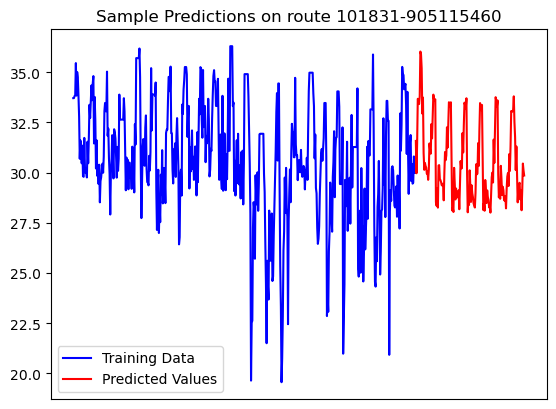

In [25]:
#visualisasi sampel dari salah satu series
import matplotlib.pyplot as plt

sample_training = training_set_final[training_set_final['unique_id'] == '101831-905115460'][['ds','y']]
sample_predictions = preds[preds['unique_id'] == '101831-905115460'][['ds','LGBMRegressor']]

plt.plot(sample_training['ds'],sample_training['y'],color='blue',label='Training Data')
plt.plot(sample_predictions['ds'],sample_predictions['LGBMRegressor'],color='red',label='Predicted Values')
plt.title('Sample Predictions on route 101831-905115460')
plt.legend()
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.show()

In [31]:
#kode untuk mencocokkan format submission dari kompetisi
#code to match the submission format of the competition

preds = preds.rename(columns={'ds':'waktu_setempat','LGBMRegressor':'rerata_kecepatan'})
preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156912 entries, 0 to 156911
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   unique_id         156912 non-null  object        
 1   waktu_setempat    156912 non-null  datetime64[ns]
 2   rerata_kecepatan  156912 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.6+ MB


In [32]:
#kode untuk mencocokkan format submission dari kompetisi
#code to match the submission format of the competition

preds['waktu_setempat'] = preds['waktu_setempat']dt.tz_localize('UTC')
#preds.info()

SyntaxError: invalid syntax (1408195267.py, line 1)

In [21]:
#kode untuk menyimpan data prediksi ke dalam file CSV dengan nama "predictions.csv".
#code to save prediction data into CSV file with name "predictions.csv".

preds.to_csv('predictions.csv',index=False)